# Part1: Tree Classifier with SKlearn
## Import the relevant libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

## Load the dataset

In [4]:
path = 'C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\heart.csv'
heart_data = pd.read_csv(path)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Let's explore the shape of the dataset

In [5]:
heart_data.shape

(303, 14)

This dataset contains 303 samples and 14 columns. Among them, 1 will be the target, the 13 others are potential features.

In [6]:
heart_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
pd.value_counts(heart_data.isnull().values.flatten())

False    4242
dtype: int64

Looks like this dataset has already been preprocessed:
- All the columns have the same amount of lines
- There are no missing values
- All the categorical data have already been turned to numerical

We just need to explore the background of the dataset to selec the relevant features and targets. The aim here will be to determine whether a patient is sickwith a heart disease given some medical analysis or parameters like it's age, sex etc...

### Let's explore the background of the dataset
To do so, we will mainly use graphs. Let's first check at the repartition of the data between the age and sex of the patients.

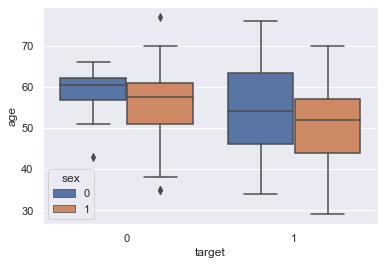

In [20]:
sns.boxplot(x = 'target',y = 'age', hue ='sex', data=heart_data)

Here we can see that most of people with heart disease in this dataset are women, and that the median of their age is greater than the men. We can also see that the age of healthy patients is greater than the sick ones and that it is less distributed. As a result, age and sex might be interesting to classifies patients.

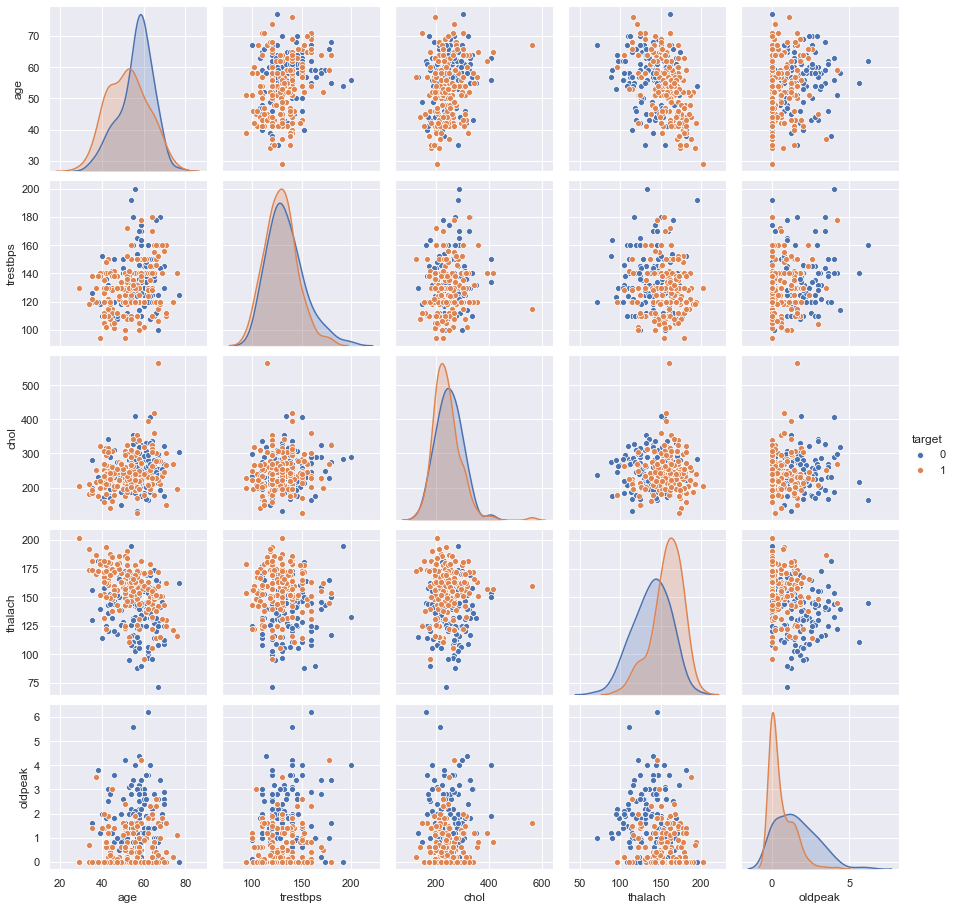

In [16]:
numericals = heart_data[['age','trestbps','chol','thalach','oldpeak','target']]
sns.pairplot(data=numericals, hue = 'target')

The goal here is to visualize all the numerical data (without the ones that used to be categorical) to see the relation between all of them. The blue dots are for people without heart_disease, the orange ones for the one with heart_disease.
What we can already say from this graph:
- There are approximately the same amount of people with heart disease and healthy ones.
- We can't clearly differenciate the state of a patient given theses features but:
    - oldpeak,
    - thalach,
might be interesting and corelated to the target.

For the categorical data, we need other graphs to explore them. Another interesting one can do with seaborn is to check at the correlation between the different features (and remove the ones too correlated)

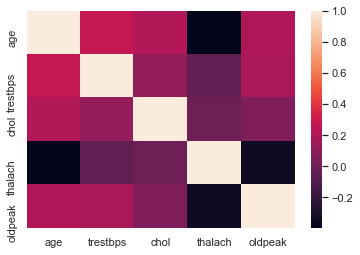

In [19]:
sns.heatmap(numericals.drop('target',axis = 1).corr())

Looks like all of these features are note strongly correlated, no need to remove some of them.

Now we will check more precisely into the other data.

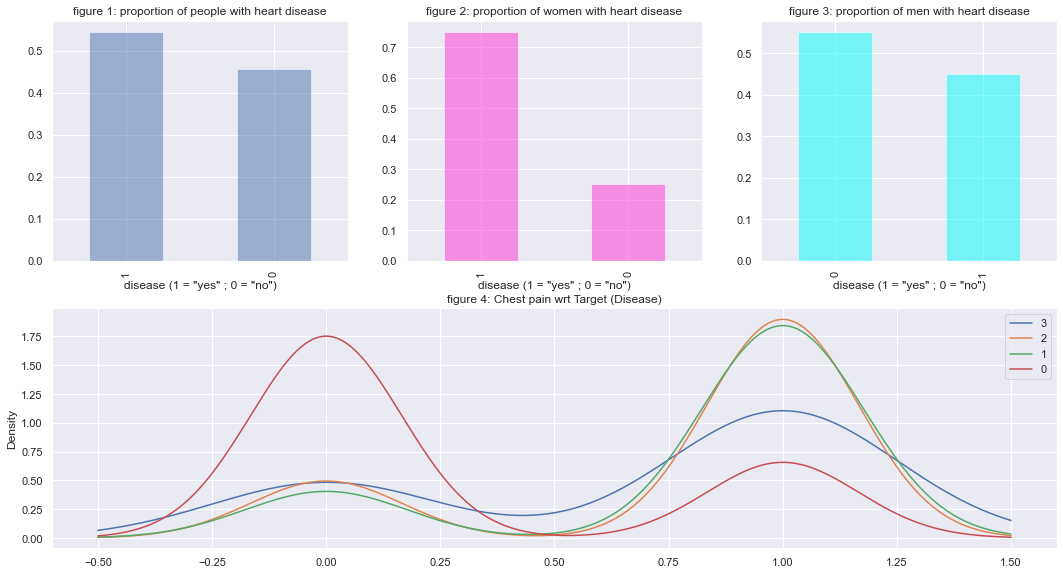

In [22]:
fig = plt.figure(figsize=(18,15))
female_color = "#FF33D7"
male_color = "#00FAFA"
sex_color = "#FA7D00"

plt.subplot2grid((3,3),(0,0))
heart_data['target'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title('figure 1: proportion of people with heart disease')
plt.xlabel('disease (1 = "yes" ; 0 = "no")')

plt.subplot2grid((3,3),(0,1))
heart_data['target'].loc[heart_data['sex'] == 0].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color = female_color)
plt.title('figure 2: proportion of women with heart disease')
plt.xlabel('disease (1 = "yes" ; 0 = "no")')

plt.subplot2grid((3,3),(0,2))
heart_data['target'].loc[heart_data['sex'] == 1].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color = male_color)
plt.title('figure 3: proportion of men with heart disease')
plt.xlabel('disease (1 = "yes" ; 0 = "no")')

plt.subplot2grid((3,3),(1,0),colspan = 4)
for x in heart_data['cp'].unique():
    heart_data['target'].loc[heart_data['cp'] == x].plot(kind='kde') # Kernel Density Estimation
plt.title("figure 4: Chest pain wrt Target (Disease)")
plt.legend(heart_data['cp'].unique())

The figures 1 to 3 are just another way to visualise the very first boxplot that was made before. The figure 5 is interesting because it shows that the kind of chest pain is strongly correlated to fate ot the patients.

Text(0.5, 1.0, 'figure 14: thalach of the patients diagnosed with disease')

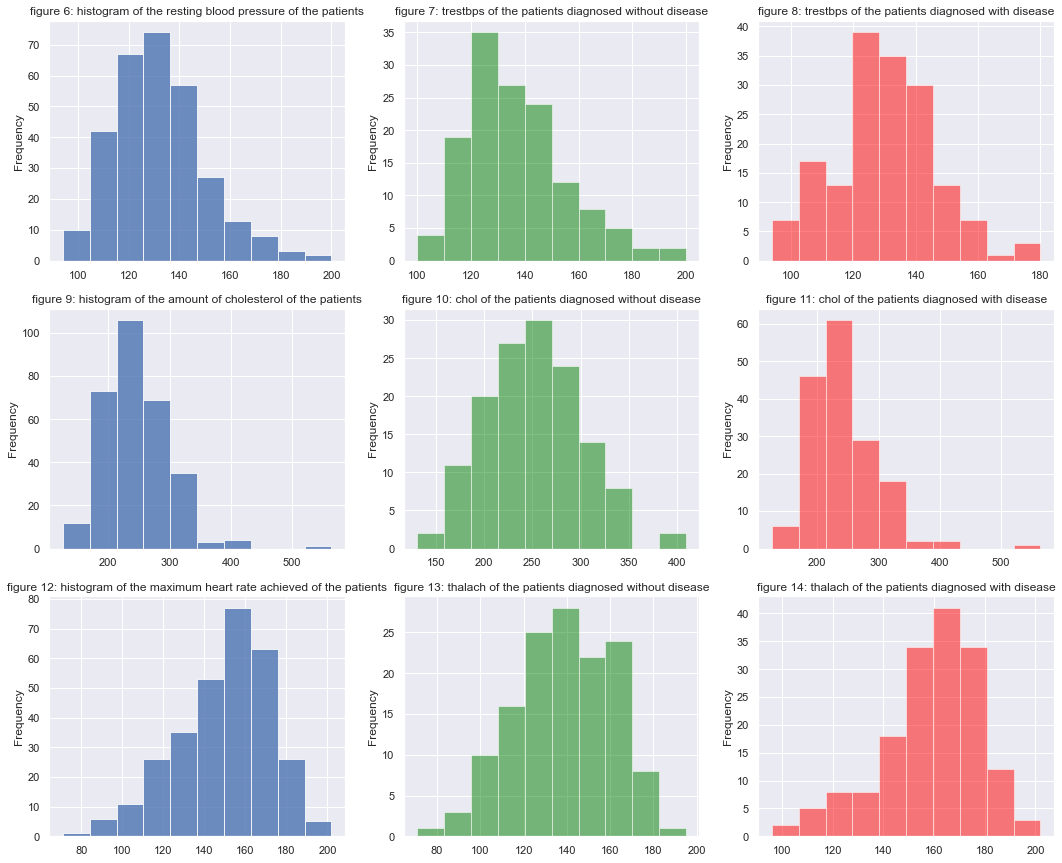

In [24]:
fig = plt.figure(figsize=(18,15))

plt.subplot2grid((3,3),(0,0))
heart_data['trestbps'].plot(kind='hist', alpha = 0.8)
plt.title('figure 6: histogram of the resting blood pressure of the patients')

plt.subplot2grid((3,3),(0,1))
heart_data['trestbps'].loc[heart_data['target'] == 0].plot(kind='hist', alpha = 0.5, color = 'green')
plt.title('figure 7: trestbps of the patients diagnosed without disease')

plt.subplot2grid((3,3),(0,2))
heart_data['trestbps'].loc[heart_data['target'] == 1].plot(kind='hist', alpha = 0.5, color = 'red')
plt.title('figure 8: trestbps of the patients diagnosed with disease')

plt.subplot2grid((3,3),(1,0))
heart_data['chol'].plot(kind='hist', alpha = 0.8)
plt.title('figure 9: histogram of the amount of cholesterol of the patients')

plt.subplot2grid((3,3),(1,1))
heart_data['chol'].loc[heart_data['target'] == 0].plot(kind='hist', alpha = 0.5, color = 'green')
plt.title('figure 10: chol of the patients diagnosed without disease')

plt.subplot2grid((3,3),(1,2))
heart_data['chol'].loc[heart_data['target'] == 1].plot(kind='hist', alpha = 0.5, color = 'red')
plt.title('figure 11: chol of the patients diagnosed with disease')

plt.subplot2grid((3,3),(2,0))
heart_data['thalach'].plot(kind='hist', alpha = 0.8)
plt.title('figure 12: histogram of the maximum heart rate achieved of the patients')

plt.subplot2grid((3,3),(2,1))
heart_data['thalach'].loc[heart_data['target'] == 0].plot(kind='hist', alpha = 0.5, color = 'green')
plt.title('figure 13: thalach of the patients diagnosed without disease')

plt.subplot2grid((3,3),(2,2))
heart_data['thalach'].loc[heart_data['target'] == 1].plot(kind='hist', alpha = 0.5, color = 'red')

plt.title('figure 14: thalach of the patients diagnosed with disease')

On these graph we explored the distributions of 3 possible features:
- blood pressure
- level of cholesterol
- maximum heart rate achieved

We can clearly see different distibution between healthy and sick patients.

### Selection of the features and targets
Now that we've looked through the dataset a bit, we might select the more relevant features to build our models of tree classifier. In the next part, we will only consider 6 features among the 13, it will be easier to visualize the trees like this.

In [32]:
features = heart_data[['age', 'sex', 'cp', 'trestbps','chol','thalach']]
target = heart_data['target']
print(features.shape, target.shape)

(303, 6) (303,)


## Tree Classifier
We will use the tree classifier form the sklearn package and explore the more interesting hyperparameter, check their impact on the model and on the trees, then we will build the best tree we can do using these parameters.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Tree Classifier: max_depth
"The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples."

In [41]:
# Let's declare the varibles:
X_not_scaled = features
y = target

# Then preprocess the data
scaler = MinMaxScaler() # We create a scaler object here, we now need to fit it to the data and then transform the data.
X_scaled = scaler.fit_transform(X_not_scaled)

# We split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42) #It is import to validate the relevance of our tree

# Now we build a Tree classifier
model_Tree_01 = DecisionTreeClassifier(max_depth = None)
model_Tree_01.fit(X_train,y_train) # Now we fit the model on the train features and train target.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The model has been created, let's check if it is great and what the tree looks like.

In [42]:
print('For a depth of None, the maximum depth reached was ' + str(model_Tree_01.tree_.max_depth) + ' and the test score is ' + str(model_Tree_01.score(X_test,y_test)))

For a depth of None, the maximum depth reached was 10 and the test score is 0.7704918032786885


In [37]:
from sklearn.tree import export_graphviz
export_graphviz(model_Tree_01, 'tree.dot', feature_names = features.columns)

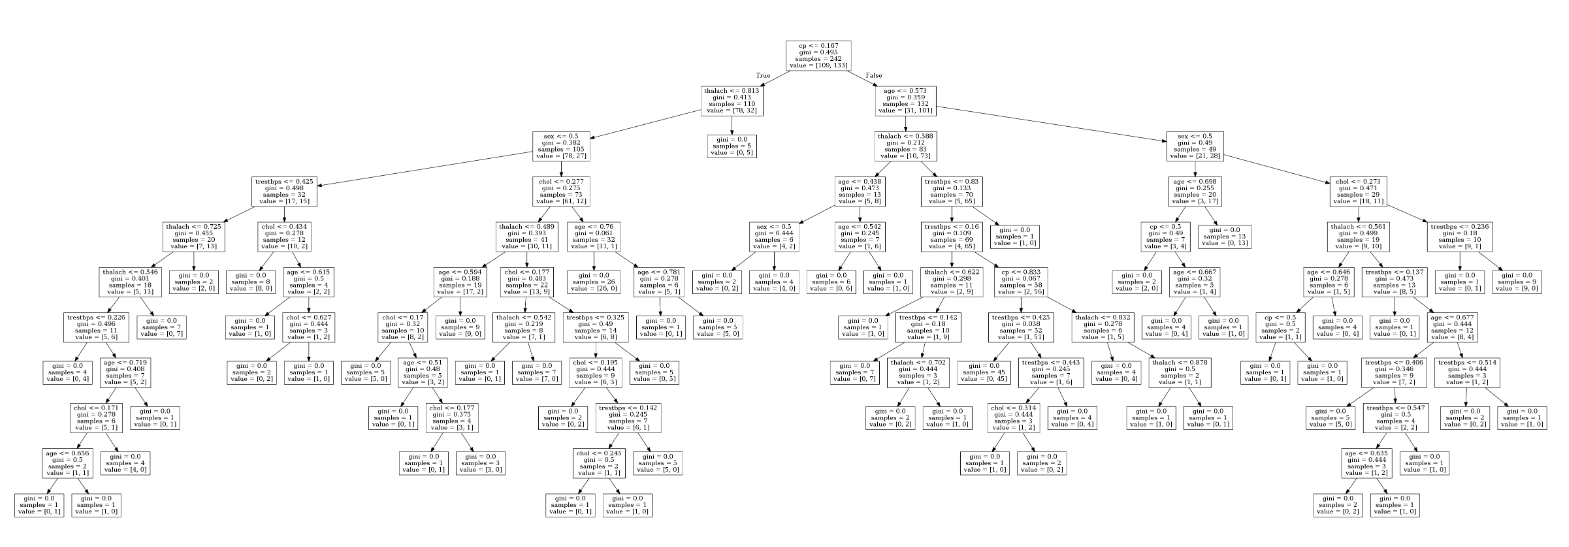
image1: model_Tree_01

As it can be seen here, the tree is very big, it has grown until all leaves are pure. We will build another tree, tiner, to look more into the details. The problem with having a very big tree is that we can be in a situation of overfitting. As a result, it can do terrible at predicting data it never seen.

In [47]:
# The features are already scaled, we just need to create a new classifier object
model_Tree_02 = DecisionTreeClassifier(max_depth = 4)
model_Tree_02.fit(X_train,y_train) # Now we fit the model on the train features and train target.

print('The maximum depth reached was ' + str(model_Tree_02.tree_.max_depth) + ' and the test score is ' + str(model_Tree_02.score(X_test,y_test)))
export_graphviz(model_Tree_02, 'tree.dot', feature_names = features.columns)

The maximum depth reached was 4 and the test score is 0.8852459016393442


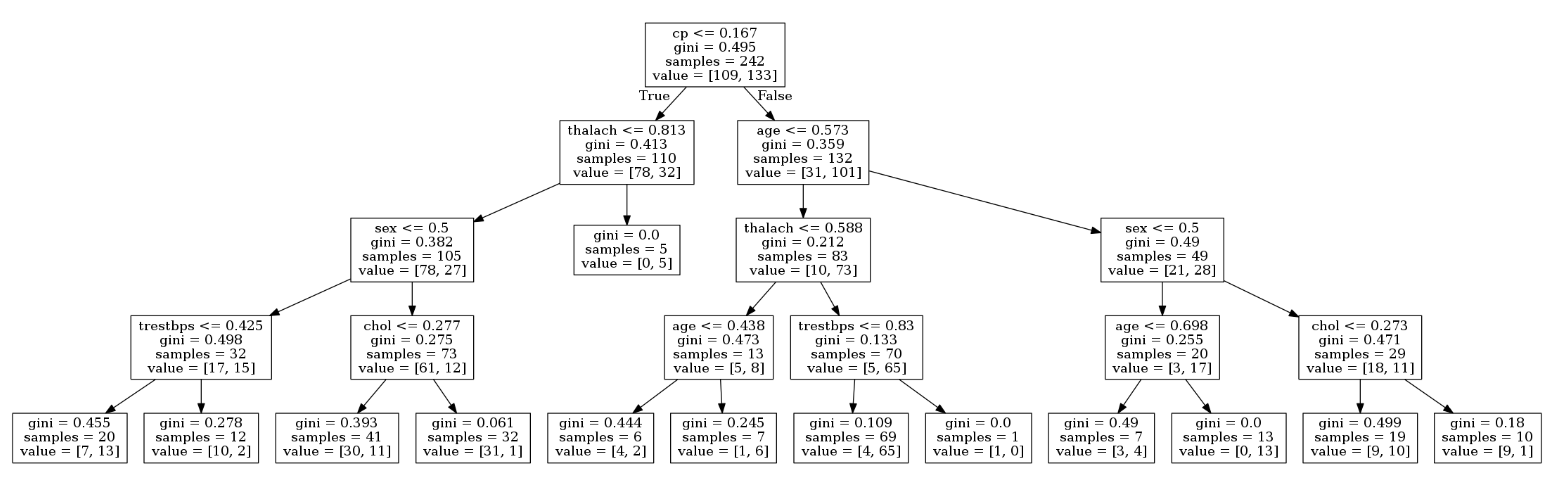
image2: model_Tree_02

How to read a tree:
- Gini : This is the measure of the impurity of the different separation. The lowest the gini, the lowest the impurty, hence, the better the node separates the data. The method to calculate the impurity is different whether it is a categorical or a numerical data. We won't go at this level of detail here.
- The leaves are the boxes where arrows are pointing at them but they are not pointing at any boxes.
- The other boxes are the nodes, and separates the data.

On this tree, we can see that the best feature selected to separate the data was the chest pain. At each node, it is specified the number of samples considered in the box.

Let's now select the best depth for our tree:

In [44]:
train_score, test_score, max_depth = [], [], []
for i in range(1,20):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
    max_depth.append(clf.tree_.max_depth)

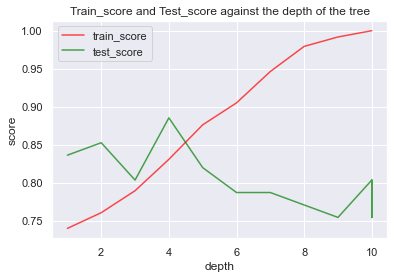

In [45]:
plt.plot(max_depth, train_score, color = 'red', alpha = 0.7, label = 'train_score')
plt.plot(max_depth, test_score, color = 'green', alpha = 0.7, label = 'test_score')
plt.legend()
plt.title('Train_score and Test_score against the depth of the tree')
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

From this graph, we can see that the deepest the tree is, the bigger the train score. However, that's not what we should check, hence the test score. the best score is obtained for a depth of 4, and we already build it !
We can also note that the deepest this tree can go is 10, which means that all leaves are pure for a depth of 10, no need to go deeper.

### Tree Classifier: max_leaf_nodes & max_leaf_nodes
max_leaf_nodes:
- Specifies the minium number of samples requiered to split an internal node
- It is possible to specifies a number or a percentage of samples

min_samples_leaf:
- It represents the minimum number of samples requiered for a box to be a leaf node. If not met, then the leaf won't be created.
- It is different from the max_leaf_nodes because in some situations, max_leaf_nodes allows the creation of the leaf, but not min_samples_leaf.

These two parameters are very usefull to build a deep tree without overfitting. let's explore those parameters with a GridSearchCV !

In [48]:
from sklearn.model_selection import GridSearchCV
cv = KFold(4, random_state = 42, shuffle = True)
param_grid = {'max_depth' : np.arange(1, 20) , 'max_leaf_nodes': [None, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'min_samples_leaf' : np.arange(2,20), 'criterion': ['gini','entropy']} # We build a dictionnary that store as keys the hyperparameters and as values the values we want for he hyperparameter
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5) # Then we build the grid, fill it with the model, the previous dictionnary and the level of cross validation
grid.fit(X_train, y_train) # We now can fit the grid on the train_set

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [49]:
print('the best score obtaines is ' + str(grid.best_score_) + ' with the parameters: ' +str(grid.best_params_))

the best score obtaines is 0.7892006802721088 with the parameters: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 2}


In [53]:
params = grid.best_params_
model_Tree_03 = DecisionTreeClassifier(criterion = params['criterion'], max_depth = params['max_depth'], max_leaf_nodes = params['max_leaf_nodes'], min_samples_leaf = params['min_samples_leaf'] )
results_log = model_Tree_03.fit(X_train, y_train)
print('The score obtained with the parameters of the grid is ' + str(results_log.score(X_test, y_test)))

The score obtained with the parameters of the grid is 0.819672131147541


The score we got here is a bit lower than the one obtained with the max_depth = 4 because it is the highest score obtained on the test set while the train set score is higher.